### KNN

In [20]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as kn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report as rep
import pandas as pd
import seaborn as sns
import cv2
import os
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
DATADIR = '/home/lenin/Documents/kaggle/color_classification/ColorClassification'
CATEGORIES = ['orange','Violet','red','Blue','Green','Black','Brown','White']
IMG_SIZE=100

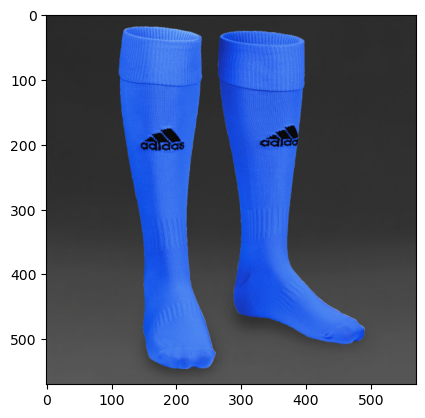

In [26]:
#verifico que reconozca los directorios y obtenga la imagen
#recorro ciclos una sola vez
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [5]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data() 

In [46]:
#legth del totol de datos train para usarlos despues
lenofimage = len(training_data)
print(lenofimage)

107


In [10]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)

In [11]:
X = X/255.0
y=np.array(y)
print(y.shape)
print(X.shape)

(107,)
(107, 30000)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [36]:
print(X_train[0])

[0.85490196 0.8627451  0.87058824 ... 0.85882353 0.86666667 0.88627451]


In [13]:
knn = kn()

In [15]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [16]:
prediccion = knn.predict(X=X_test)

In [22]:
print("Accuracy con knn",accuracy_score(y_test,prediccion))

Accuracy con knn 0.5925925925925926


In [ ]:
result = pd.DataFrame({'original' : y_test,'predicha' : prediccion})
result

,original,predicha
0,6,5
1,3,3
2,1,1
3,3,3
4,6,6
5,1,1
6,5,5
7,2,6
8,1,0
9,4,3


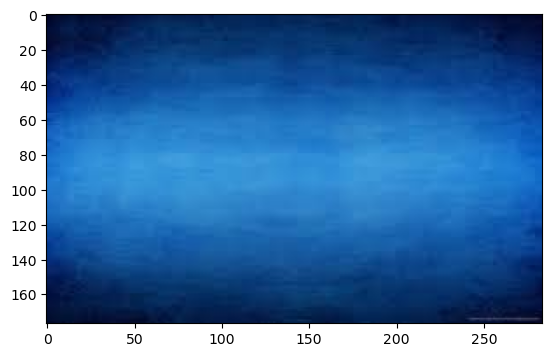

(1, 30000)
[6]


In [ ]:
img=cv2.imread(os.path.join('/home/lenin/Documents/kaggle/color_classification/ColorClassification/Brown/','6.jpg'))
x=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
x = np.reshape(x, (1, -1))
x=x/255.0
plt.imshow(img)
plt.show()
print(x.shape)
resp = knn.predict(X=x)
print(resp)